In [1]:
#import dependencies

import pandas as pd
import numpy as np
import re
pd.set_option('max_colwidth', 400)

In [2]:
# read data into dataframe

wp_mentalhealth_df = pd.read_csv("Resources/survey.csv")

wp_mentalhealth_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/14 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/14 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/14 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/14 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/14 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
#brief summary of the dataframe

wp_mentalhealth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [4]:
# dataframe columns

wp_mentalhealth_df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [5]:
#drop unneeded columns

new_wp_mentalhealth_df = wp_mentalhealth_df.drop(['state', 'self_employed','coworkers','comments','tech_company',
                         'remote_work','supervisor','work_interfere','leave','obs_consequence'],axis=1)

In [6]:
#cleaning age column
new_wp_mentalhealth_df['Age'].astype(int)
new_wp_mentalhealth_df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

In [7]:
new_wp_mentalhealth_df.loc[new_wp_mentalhealth_df['Age'] > 100, 'Age'] = 0
new_wp_mentalhealth_df.loc[new_wp_mentalhealth_df['Age'] < 15, 'Age'] = 0
#new_wp_mentalhealth_df.loc[new_wp_mentalhealth_df['Age'] == 0, 'Age'] = "N/A"

In [8]:
new_wp_mentalhealth_df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21,  0, 43, 56, 60, 54, 55,
       48, 20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [9]:
new_wp_mentalhealth_df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [10]:
#cleaning gender column
othergender = ['Male-ish', 'Trans-female', 'Cis Female', 'something kinda male?',
       'Cis Male', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
        'Trans woman', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'cis male', 'A little about you',
        'p', 'Cis Man',
       'ostensibly male, unsure what that really means']
for ch in othergender:
        new_wp_mentalhealth_df.loc[new_wp_mentalhealth_df['Gender']==ch, 'Gender'] = 'Other'
        new_wp_mentalhealth_df.loc[new_wp_mentalhealth_df['Gender'].str.contains('^F|^W',flags=re.IGNORECASE, regex=True), 'Gender'] = 'Female'
        new_wp_mentalhealth_df.loc[new_wp_mentalhealth_df['Gender'].str.contains('^M',flags=re.IGNORECASE, regex=True), 'Gender'] = 'Male'

In [11]:
new_wp_mentalhealth_df['Gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [12]:
#renaming new csv columns 
new_wp_mentalhealth_df.rename(columns = {'family_history':'Family History', 'treatment':'Seeks Treatment', 'no_employees': '# of Employees',
                           'benefits':'Have Benefits','care_options':'Care Options','wellness_program':'Wellness Programs',
                           'seek_help':'Help Resources','anonymity':'Anonymity', 'mental_health_consequence':'Mental Health Consequence',
                           'phys_health_consequence':'Physical Health Consequence','mental_health_interview':'Mental Health Interview',
                           'phys_health_interview':'Physical Health Interview','mental_vs_physical':'Mental v. Physical'}, inplace = True)
#saving into new csv

new_wp_mentalhealth_df.to_csv('Resources/workplace mental health.csv')

new_wp_mentalhealth_df.columns


Index(['Timestamp', 'Age', 'Gender', 'Country', 'Family History',
       'Seeks Treatment', '# of Employees', 'Have Benefits', 'Care Options',
       'Wellness Programs', 'Help Resources', 'Anonymity',
       'Mental Health Consequence', 'Physical Health Consequence',
       'Mental Health Interview', 'Physical Health Interview',
       'Mental v. Physical'],
      dtype='object')

In [13]:
#creating new csv for stephanie's research question

mental_health_assistance_df = new_wp_mentalhealth_df[['Have Benefits','Seeks Treatment', 'Care Options', 'Wellness Programs', 'Help Resources', 'Anonymity']]

mental_health_assistance_df.to_csv('Resources/workplace assistance.csv')

mental_health_assistance_df.head()


,Have Benefits,Seeks Treatment,Care Options,Wellness Programs,Help Resources,Anonymity
0,Yes,Yes,Not sure,No,Yes,Yes
1,Don't know,No,No,Don't know,Don't know,Don't know
2,No,No,No,No,No,Don't know
3,No,Yes,Yes,No,No,No
4,Yes,No,No,Don't know,Don't know,Don't know


In [14]:
#if the workplace offers mental health assistance, are employees less likely to suffer from mental health?

In [15]:
#if the worker is anonymously protected are they more likely to seek out help from their workplace mental health assistance programs?

In [16]:
#creating new csv for mai's research question
mai_df = new_wp_mentalhealth_df.drop(['Timestamp', 'Country', '# of Employees', 'Help Resources',
                                     'Mental Health Consequence', 'Physical Health Consequence',
                                     'Mental Health Interview', 'Physical Health Interview',
                                     'Mental v. Physical'],axis=1)
mai_df.to_csv('Resources/FamilyHis vs SeekingHelp.csv')


mai_df.head()


,Age,Gender,Family History,Seeks Treatment,Have Benefits,Care Options,Wellness Programs,Anonymity
0,37,Female,No,Yes,Yes,Not sure,No,Yes
1,44,Male,No,No,Don't know,No,Don't know,Don't know
2,32,Male,No,No,No,No,No,Don't know
3,31,Male,Yes,Yes,No,Yes,No,No
4,31,Male,No,No,Yes,No,Don't know,Don't know


In [17]:
import seaborn as sns

/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 30.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 52.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 39.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/j.mai.le/anaconda3/lib/python3.11/site-packages/se

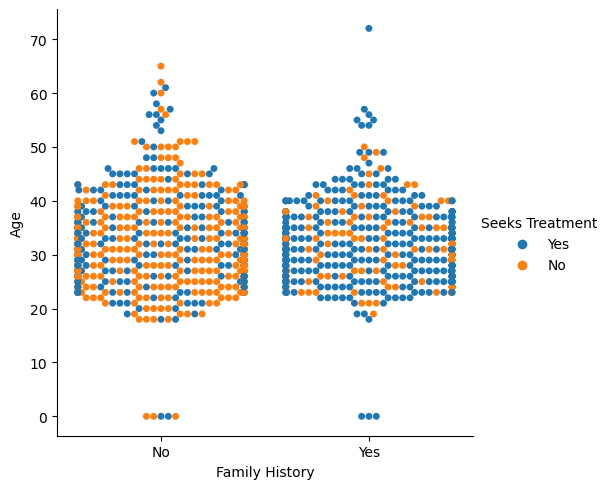

In [18]:
sns.catplot(data=mai_df, x="Family History", y=("Age"), hue = "Seeks Treatment" , kind ="swarm")

<Axes: xlabel='Family History', ylabel='Age'>

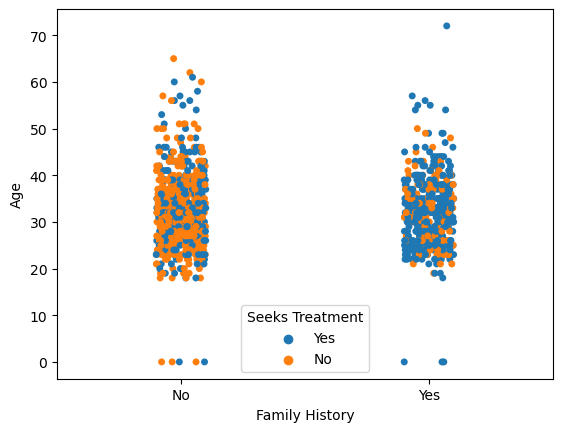

In [19]:

sns.stripplot(data=mai_df, x="Family History", y=("Age"), hue = "Seeks Treatment")

<Axes: xlabel='Gender', ylabel='Anonymity'>

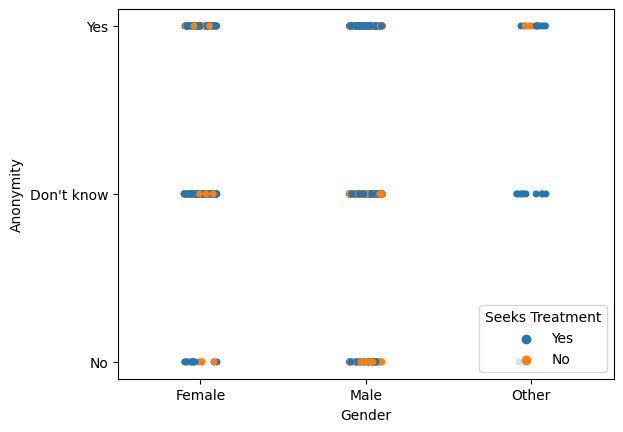

In [20]:
sns.stripplot(data=mai_df, x="Gender", y="Anonymity", hue = "Seeks Treatment")

In [36]:
import researchpy as rp
import scipy.stats as stats


In [21]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as smt


In [41]:
mai_df1 = mai_df[["Family History", "Seeks Treatment"]].value_count

AttributeError: 'DataFrame' object has no attribute 'value_count'

In [40]:
table = sm.stats.Table.from_data(mai_df1)
res =  table.test_nominal_association()
print(table.table_orig)
print("-------------------")
print (res)

Seeks Treatment   No  Yes
Family History           
No               495  272
Yes              127  365
-------------------
df          1
pvalue      0.0
statistic   179.81261578055398


In [38]:
mai_df2 = mai_df[["Gender", "Seeks Treatment"]]
table2 = sm.stats.Table.from_data(mai_df2)
res2 =  table2.test_nominal_association()
print(table2.table_orig)
print("-------------------")
print (res2)

Seeks Treatment   No  Yes
Gender                   
Female            77  171
Male             541  446
Other              4   20
-------------------
df          2
pvalue      9.96647209206003e-13
statistic   55.26870128808481


In [39]:
mai_df3 = mai_df[["Seeks Treatment", "Anonymity"]]
table3 = sm.stats.Table.from_data(mai_df3)
res3 =  table3.test_nominal_association()
print(table3.table_orig)
print("-------------------")
print (res3)

Anonymity        Don't know  No  Yes
Seeks Treatment                     
No                      448  27  147
Yes                     371  38  228
-------------------
df          2
pvalue      1.8304549906922318e-06
statistic   26.42189198645524
